In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv("../data/spotify_tracks.csv")
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df_ml = df.drop(columns=["track_id", "track_name", "artists", "album_name"])

df_ml = df_ml[df_ml["duration_ms"] < 600000]

df_ml = df_ml.drop_duplicates()

df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113397 entries, 0 to 113999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113397 non-null  int64  
 1   popularity        113397 non-null  int64  
 2   duration_ms       113397 non-null  int64  
 3   explicit          113397 non-null  bool   
 4   danceability      113397 non-null  float64
 5   energy            113397 non-null  float64
 6   key               113397 non-null  int64  
 7   loudness          113397 non-null  float64
 8   mode              113397 non-null  int64  
 9   speechiness       113397 non-null  float64
 10  acousticness      113397 non-null  float64
 11  instrumentalness  113397 non-null  float64
 12  liveness          113397 non-null  float64
 13  valence           113397 non-null  float64
 14  tempo             113397 non-null  float64
 15  time_signature    113397 non-null  int64  
 16  track_genre       113397 

In [6]:
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration_ms"
]

X = df_ml[features]
y = df_ml["popularity"]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((90717, 10), (22680, 10))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(18.472781634219384, np.float64(22.118247860574996), 0.022857449334553026)

In [11]:
importance = pd.DataFrame({
    "feature": X.columns,
    "coef": model.coef_
}).sort_values(by="coef", ascending=False)

importance

,feature,coef
0,danceability,1.596791
2,loudness,0.592405
8,tempo,0.460173
6,liveness,0.304269
9,duration_ms,0.052945
4,acousticness,-0.394660
1,energy,-0.753941
3,speechiness,-1.296161
5,instrumentalness,-2.449954
7,valence,-2.484048


In [18]:
from sklearn.ensemble import RandomForestRegressor


In [23]:
rf = RandomForestRegressor(
    n_estimators=200,      # número de árboles
    random_state=42,
    n_jobs=-1,            # usa todos los núcleos posibles
    max_depth=None,       # sin límite de profundidad por ahora
    min_samples_leaf=1
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [20]:
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(10.59641406219612, np.float64(14.98745766909226), 0.5513450916101803)

In [21]:
importance_rf = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

importance_rf


,feature,importance
4,acousticness,0.111880
9,duration_ms,0.107863
0,danceability,0.106649
8,tempo,0.106561
7,valence,0.104585
3,speechiness,0.102793
2,loudness,0.099451
1,energy,0.095261
6,liveness,0.091199
5,instrumentalness,0.073758


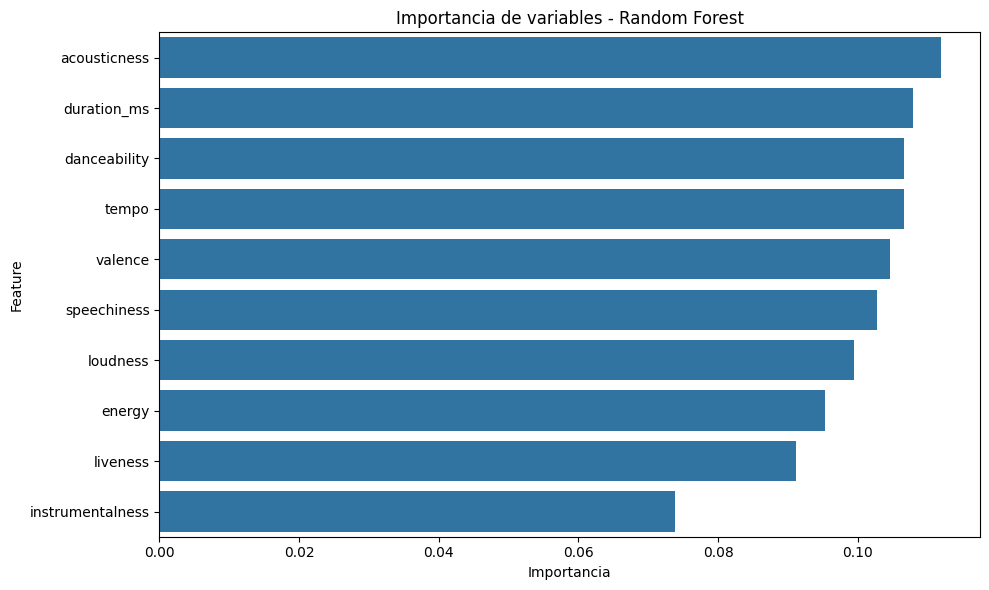

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importancias desde tu modelo RANDOM FOREST entrenado
importances = rf.feature_importances_
feature_names = X.columns

# Ordenar de menor a mayor y luego invertir para ver las más importantes arriba
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[indices],
    y=np.array(feature_names)[indices]
)
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

plt.tight_layout()
plt.savefig("../images/random_forest_importancias.png", dpi=300, bbox_inches="tight")
plt.show()
